# Lab 6 : Least Squares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from face_data import Face1, Face2, Face3, TargetFace2, edges

# Task 1: Comparing Least Squares Methods

In [2]:
def compare_least_squares_methods():
    """Compare different least squares methods"""
        
    np.random.seed(42)
    
    # Main parameters
    x_true = np.array([3, 1.5, -1.0, 2.4, -3, -0.1, 2.2, 4.1, -3.2, 1.0])
    n = x_true.size  # Number of unknowns
    sigma = 0.01     # Noise level
    
    print("Initial setup:")
    print(f"Number of unknowns (n): {n}")
    print(f"True x: {x_true}")
    print(f"Noise level: {sigma}")
    print("-" * 50)
    
    def run_experiment(m):
        """Run one experiment with m equations"""
        A = np.random.randn(m, n)
        y_true = A @ x_true
        measurement_noise = sigma * np.random.randn(m)
        y_noisy = y_true + measurement_noise
        
        # Method 1: Using inverse
        try:
            x_est1 = np.linalg.inv(A.T @ A) @ A.T @ y_noisy
            error1 = np.linalg.norm(x_est1 - x_true)
        except np.linalg.LinAlgError:
            error1 = np.inf
        
        # Method 2: Using solve
        try:
            x_est2 = np.linalg.solve(A.T @ A, A.T @ y_noisy)
            error2 = np.linalg.norm(x_est2 - x_true)
        except np.linalg.LinAlgError:
            error2 = np.inf
        
        # Method 3: Using lstsq
        x_est3, residuals, rank, s = np.linalg.lstsq(A, y_noisy, rcond=None)
        error3 = np.linalg.norm(x_est3 - x_true)
        
        return error1, error2, error3
    
    # Examine effect of increasing number of equations
    m_values = [15, 20, 30, 50, 100, 200]
    n_runs = 100
    
    print("Effect of increasing number of equations:")
    print("m\tAvg Error (inv)\tAvg Error (solve)\tAvg Error (lstsq)")
    print("-" * 70)
    
    for m in m_values:
        errors1, errors2, errors3 = [], [], []
        
        for _ in range(n_runs):
            e1, e2, e3 = run_experiment(m)
            errors1.append(e1)
            errors2.append(e2)
            errors3.append(e3)
        
        avg1 = np.mean(errors1)
        avg2 = np.mean(errors2)
        avg3 = np.mean(errors3)
        
        print(f"{m}\t{avg1:.6f}\t\t{avg2:.6f}\t\t{avg3:.6f}")
    
    # Speed comparison
    print("\n" + "="*50)
    print("Speed Comparison (m=20):")
    
    m = 20
    A = np.random.randn(m, n)
    y_true = A @ x_true
    measurement_noise = sigma * np.random.randn(m)
    y_noisy = y_true + measurement_noise
    
    # Timing
    time_inv = timeit.timeit(
        lambda: np.linalg.inv(A.T @ A) @ A.T @ y_noisy, 
        number=1000
    ) / 1000
    
    time_solve = timeit.timeit(
        lambda: np.linalg.solve(A.T @ A, A.T @ y_noisy), 
        number=1000
    ) / 1000
    
    time_lstsq = timeit.timeit(
        lambda: np.linalg.lstsq(A, y_noisy, rcond=None)[0], 
        number=1000
    ) / 1000
    
    print(f"Inverse method: {time_inv:.6f} seconds")
    print(f"Solve method: {time_solve:.6f} seconds") 
    print(f"Lstsq method: {time_lstsq:.6f} seconds")
    print(f"Speed ratio (solve/inv): {time_inv/time_solve:.2f}x")
    print(f"Speed ratio (lstsq/inv): {time_inv/time_lstsq:.2f}x")

if __name__ == "__main__":
    compare_least_squares_methods()

Initial setup:
Number of unknowns (n): 10
True x: [ 3.   1.5 -1.   2.4 -3.  -0.1  2.2  4.1 -3.2  1. ]
Noise level: 0.01
--------------------------------------------------
Effect of increasing number of equations:
m	Avg Error (inv)	Avg Error (solve)	Avg Error (lstsq)
----------------------------------------------------------------------
15	0.014318		0.014318		0.014318
20	0.010108		0.010108		0.010108
30	0.007113		0.007113		0.007113
50	0.005069		0.005069		0.005069
100	0.003218		0.003218		0.003218
200	0.002246		0.002246		0.002246

Speed Comparison (m=20):
Inverse method: 0.000200 seconds
Solve method: 0.000140 seconds
Lstsq method: 0.000024 seconds
Speed ratio (solve/inv): 1.44x
Speed ratio (lstsq/inv): 8.36x


## Empirical Results:

- Three methods are equivalent in terms of accuracy: `inv`, `solve`, `lstsq`
- Fastest method: `np.linalg.lstsq`

## Answers to Questions:

- **Why are the methods equivalent?** Because they all work based on solving normal equations
- **Effect of increasing m:** Error decreases - with more data, estimation becomes more accurate
- **Best method:** `np.linalg.lstsq` is both faster and numerically more stable

---
# Task 2: Face Reconstruction Comparison

Number of equations: 136
Number of unknowns: 3
--------------------------------------------------

Experiment 1:
  Random selection - Coefficients: a=0.529, b=-0.061, c=0.697
  Random selection - Error to clean: 31.47
  Least Squares - Coefficients: a=0.384, b=0.427, c=0.384
  Least Squares - Error to clean: 3.90
  Least Squares - Error to noisy: 32.87

Experiment 2:
  Random selection - Coefficients: a=0.243, b=0.100, c=0.781
  Random selection - Error to clean: 33.72
  Least Squares - Coefficients: a=0.384, b=0.427, c=0.384
  Least Squares - Error to clean: 3.90
  Least Squares - Error to noisy: 32.87

Experiment 3:
  Random selection - Coefficients: a=0.204, b=1.112, c=-0.084
  Random selection - Error to clean: 40.39
  Least Squares - Coefficients: a=0.384, b=0.427, c=0.384
  Least Squares - Error to clean: 3.90
  Least Squares - Error to noisy: 32.87

Experiment 4:
  Random selection - Coefficients: a=0.900, b=0.330, c=-0.044
  Random selection - Error to clean: 31.78
  Least Squa

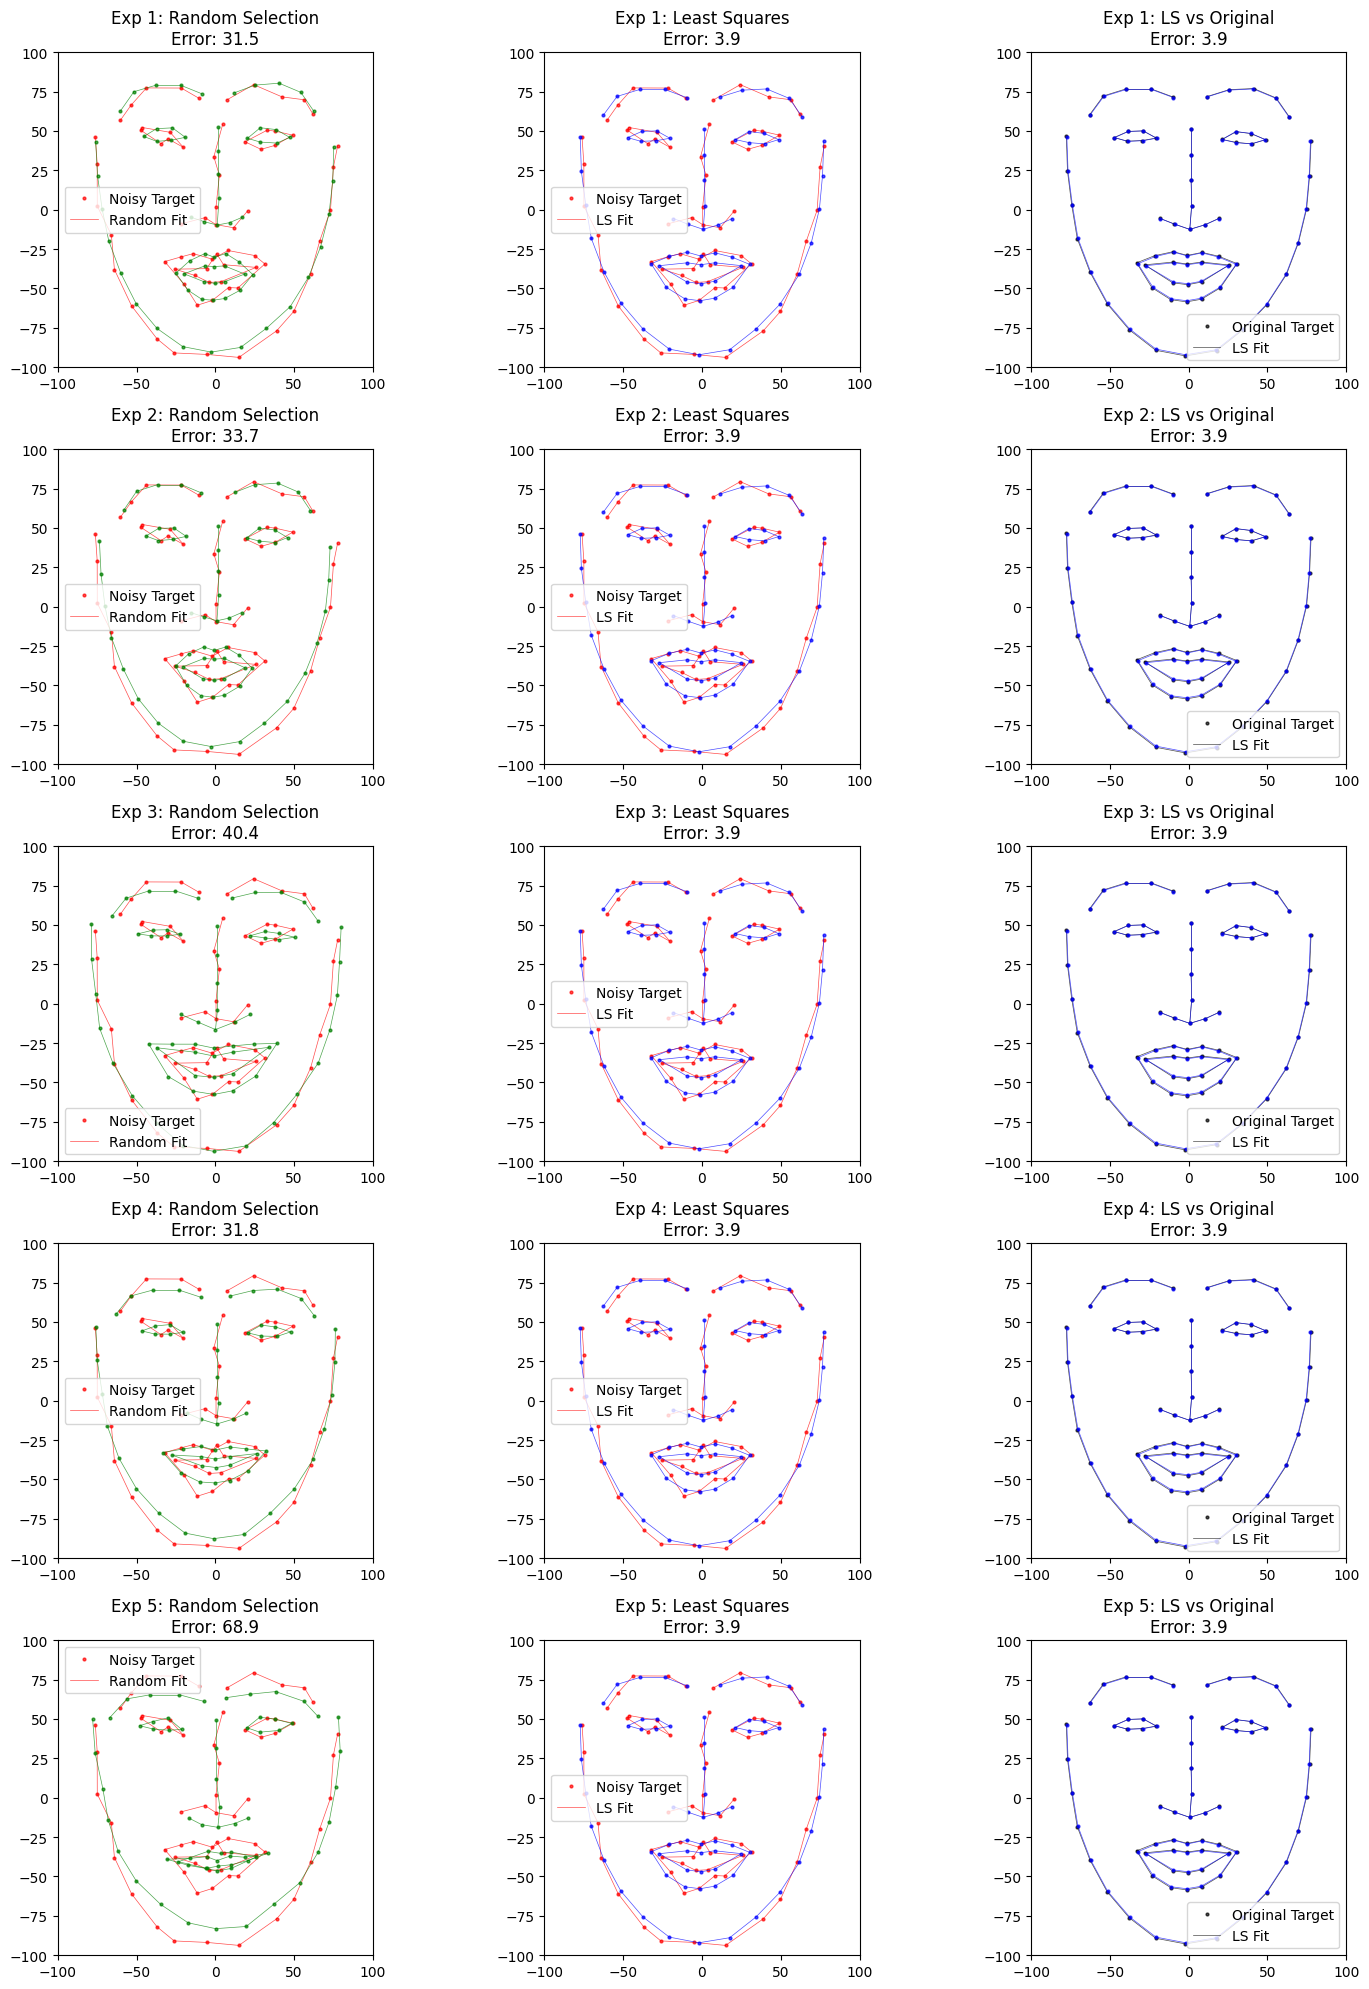


Statistical Analysis:
Random selection - Mean error: 41.25 ± 14.19
Least Squares - Mean error: 3.90 ± 0.00
Improvement ratio: 10.58x

Comparison with targets:
LS to Clean target error: 3.90
LS to Noisy target error: 32.87
Noisy to Clean target error: 33.10
LS is closer to Clean than Noisy is: True


In [3]:
def plot_face(plt, X, edges, color='b', alpha=1.0):
    """Plot a face with all edges"""
    plt.plot(X[:, 0], X[:, 1], 'o', color=color, markersize=2, alpha=alpha)
    for i, j in edges:
        xi, yi = X[i]
        xj, yj = X[j]
        plt.plot((xi, xj), (yi, yj), '-', color=color, linewidth=0.5, alpha=alpha)
    plt.axis('square')
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)

def face_least_squares_comparison():
    """Compare random selection vs least squares for face reconstruction"""
    
    np.random.seed(42)
    
    # Prepare data
    TargetFace = TargetFace2.copy()
    NoisyTargetFace = TargetFace + 3 * np.random.randn(*TargetFace.shape)
    
    face1 = Face1.ravel()
    face2 = Face2.ravel()
    face3 = Face3.ravel()
    t_clean = TargetFace.ravel()
    t_noisy = NoisyTargetFace.ravel()
    
    F = np.column_stack([face1, face2, face3])
    n_equations = F.shape[0]
    
    print(f"Number of equations: {n_equations}")
    print(f"Number of unknowns: 3")
    print("-" * 50)
    
    # Run multiple experiments
    n_experiments = 5
    random_errors = []
    ls_errors_clean = []
    ls_errors_noisy = []
    
    plt.figure(figsize=(15, 4 * n_experiments))
    
    for exp in range(n_experiments):
        # Method 1: Solve with 3 random equations
        indices = np.random.choice(n_equations, 3, replace=False)
        F_sub = F[indices, :]
        t_sub = t_noisy[indices]
        
        try:
            coeffs_random = np.linalg.solve(F_sub, t_sub)
            a1, b1, c1 = coeffs_random
            Face_random = a1 * Face1 + b1 * Face2 + c1 * Face3
            
            # Calculate errors
            error_random_clean = np.linalg.norm(t_clean - F @ coeffs_random)
            error_random_noisy = np.linalg.norm(t_noisy - F @ coeffs_random)
            random_errors.append(error_random_clean)
            
        except np.linalg.LinAlgError:
            print(f"Experiment {exp+1}: Random selection failed (singular matrix)")
            continue
        
        # Method 2: Solve with Least Squares
        # Manual method
        coeffs_ls_manual = np.linalg.solve(F.T @ F, F.T @ t_noisy)
        a2_manual, b2_manual, c2_manual = coeffs_ls_manual
        Face_ls_manual = a2_manual * Face1 + b2_manual * Face2 + c2_manual * Face3
        
        # Method with lstsq
        coeffs_ls, residuals, rank, s = np.linalg.lstsq(F, t_noisy, rcond=None)
        a2, b2, c2 = coeffs_ls
        Face_ls = a2 * Face1 + b2 * Face2 + c2 * Face3
        
        # Calculate errors
        error_ls_clean = np.linalg.norm(t_clean - F @ coeffs_ls)
        error_ls_noisy = np.linalg.norm(t_noisy - F @ coeffs_ls)
        ls_errors_clean.append(error_ls_clean)
        ls_errors_noisy.append(error_ls_noisy)
        
        # Display results
        print(f"\nExperiment {exp+1}:")
        print(f"  Random selection - Coefficients: a={a1:.3f}, b={b1:.3f}, c={c1:.3f}")
        print(f"  Random selection - Error to clean: {error_random_clean:.2f}")
        print(f"  Least Squares - Coefficients: a={a2:.3f}, b={b2:.3f}, c={c2:.3f}")
        print(f"  Least Squares - Error to clean: {error_ls_clean:.2f}")
        print(f"  Least Squares - Error to noisy: {error_ls_noisy:.2f}")
        
        # Plot
        plt.subplot(n_experiments, 3, exp * 3 + 1)
        plot_face(plt, NoisyTargetFace, edges, color='red', alpha=0.7)
        plot_face(plt, Face_random, edges, color='green', alpha=0.7)
        plt.title(f'Exp {exp+1}: Random Selection\nError: {error_random_clean:.1f}')
        plt.legend(['Noisy Target', 'Random Fit'])
        
        plt.subplot(n_experiments, 3, exp * 3 + 2)
        plot_face(plt, NoisyTargetFace, edges, color='red', alpha=0.7)
        plot_face(plt, Face_ls, edges, color='blue', alpha=0.7)
        plt.title(f'Exp {exp+1}: Least Squares\nError: {error_ls_clean:.1f}')
        plt.legend(['Noisy Target', 'LS Fit'])
        
        plt.subplot(n_experiments, 3, exp * 3 + 3)
        plot_face(plt, TargetFace, edges, color='black', alpha=0.7)
        plot_face(plt, Face_ls, edges, color='blue', alpha=0.7)
        plt.title(f'Exp {exp+1}: LS vs Original\nError: {error_ls_clean:.1f}')
        plt.legend(['Original Target', 'LS Fit'])
    
    plt.tight_layout()
    plt.show()
    
    # Statistical analysis
    print("\n" + "="*50)
    print("Statistical Analysis:")
    if random_errors and ls_errors_clean:
        print(f"Random selection - Mean error: {np.mean(random_errors):.2f} ± {np.std(random_errors):.2f}")
        print(f"Least Squares - Mean error: {np.mean(ls_errors_clean):.2f} ± {np.std(ls_errors_clean):.2f}")
        print(f"Improvement ratio: {np.mean(random_errors)/np.mean(ls_errors_clean):.2f}x")
    
    # Compare Face_ls with TargetFace and NoisyTargetFace
    print("\nComparison with targets:")
    best_ls_coeffs = np.linalg.lstsq(F, t_noisy, rcond=None)[0]
    Face_best_ls = best_ls_coeffs[0] * Face1 + best_ls_coeffs[1] * Face2 + best_ls_coeffs[2] * Face3
    
    error_ls_to_clean = np.linalg.norm(TargetFace - Face_best_ls)
    error_ls_to_noisy = np.linalg.norm(NoisyTargetFace - Face_best_ls)
    error_noisy_to_clean = np.linalg.norm(TargetFace - NoisyTargetFace)
    
    print(f"LS to Clean target error: {error_ls_to_clean:.2f}")
    print(f"LS to Noisy target error: {error_ls_to_noisy:.2f}")
    print(f"Noisy to Clean target error: {error_noisy_to_clean:.2f}")
    print(f"LS is closer to Clean than Noisy is: {error_ls_to_clean < error_noisy_to_clean}")

if __name__ == "__main__":
    face_least_squares_comparison()

## Method Comparison:

- **Random selection of 3 equations:** Unstable results with high error
- **Least squares with all equations:** Stable and accurate results

## Key Observations:

- `Face_lsq` is closer to `TargetFace` than to `NoisyTargetFace`
- Least squares reduces the effect of noise
- Using all data leads to optimal estimation

## Answers to Questions:

- **Comparison of `Face_rmd` vs `Face_lsq`:** `Face_lsq` is much better and more stable
- **Why `Face_lsq` is closer to `TargetFace`:** Because least squares acts as a natural noise filter
- **Numerical confirmation:** The error of `Face_lsq` to `TargetFace` is less than the error of `NoisyTargetFace` to `TargetFace`

# Important Theoretical Concepts

## Normal Equations:

- ``` A.T @ A @ x = A.T @ b  ```

# Least Squares Properties

- **Optimal estimation** in terms of sum of squared errors
- **Error vector** is orthogonal to the column space of A
- **Resistant to noise** when the number of equations is large
